In [14]:
import math
import numpy as np
import sklearn.datasets as dataset
import matplotlib.pyplot as graph

In [2]:
MIN_COST_DIFF = 1E-5
MAX_ITERATIONS = 10000
LEARNING_RATE = 0.01

In [3]:
data = dataset.load_iris()

target = np.array(data.target)
feature = np.array(data.data)

cost = [float('inf')]

target = (target == 0).astype(int)
feature = (feature - np.mean(feature, axis=0)) / np.std(feature, axis=0)

feature = np.c_[np.ones(feature.shape[0]), feature]
theta = np.zeros(feature.shape[1])

In [4]:
for i in range(MAX_ITERATIONS):
    hypothesis = feature @ theta
    prediction = 1 / (1 + np.exp(-hypothesis))

    error =  prediction - target
    gradient = (feature.T @ error) / len(feature)
    theta -= LEARNING_RATE * gradient
    current_cost = -(np.dot(target, np.log(prediction)) + np.dot(1-target,np.log(1 - prediction + 1e-15))) / len(feature)   
    cost.append(current_cost)

    if abs(cost[-1] - cost[-2]) <= MIN_COST_DIFF:
        break

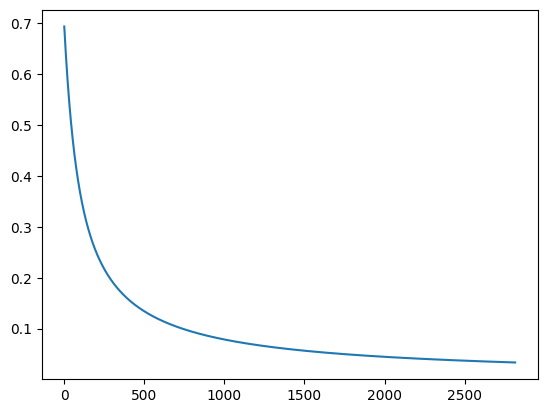

In [5]:
graph.plot(cost[1:])
graph.show()